In [1]:
import pandas as pd

In [10]:
df = pd.read_csv("ewc_fisher_params.csv")

In [11]:
df

,param_name,mean_fisher_importance
0,model.decoder.embed_positions.weight,332381.468750
1,model.decoder.embed_tokens.weight,7163.888184
2,model.decoder.layer_norm.bias,1065.960083
3,model.decoder.layer_norm.weight,22846.875000
4,model.decoder.layers.0.encoder_attn.k_proj.weight,36994.914062
...,...,...
162,model.encoder.layers.3.self_attn.q_proj.weight,529.144348
163,model.encoder.layers.3.self_attn.v_proj.bias,17841.486328
164,model.encoder.layers.3.self_attn.v_proj.weight,11260.207031
165,model.encoder.layers.3.self_attn_layer_norm.bias,4983.273926


In [21]:
df_param_name = df["param_name"].str.split(".", expand=True)
df_param_name

,0,1,2,3,4,5,6
0,model,decoder,embed_positions,weight,None,None,None
1,model,decoder,embed_tokens,weight,None,None,None
2,model,decoder,layer_norm,bias,None,None,None
3,model,decoder,layer_norm,weight,None,None,None
4,model,decoder,layers,0,encoder_attn,k_proj,weight
...,...,...,...,...,...,...,...
162,model,encoder,layers,3,self_attn,q_proj,weight
163,model,encoder,layers,3,self_attn,v_proj,bias
164,model,encoder,layers,3,self_attn,v_proj,weight
165,model,encoder,layers,3,self_attn_layer_norm,bias,None


In [26]:
df_param_name[1].value_counts()

decoder    100
encoder     67
Name: 1, dtype: int64

In [28]:
df_param_name[2].value_counts()

layers             156
layer_norm           4
embed_positions      2
conv1                2
conv2                2
embed_tokens         1
Name: 2, dtype: int64

In [22]:
df = pd.concat([df, df_param_name], axis=1)

In [23]:
df

,param_name,mean_fisher_importance,0,1,2,3,4,5,6
0,model.decoder.embed_positions.weight,332381.468750,model,decoder,embed_positions,weight,None,None,None
1,model.decoder.embed_tokens.weight,7163.888184,model,decoder,embed_tokens,weight,None,None,None
2,model.decoder.layer_norm.bias,1065.960083,model,decoder,layer_norm,bias,None,None,None
3,model.decoder.layer_norm.weight,22846.875000,model,decoder,layer_norm,weight,None,None,None
4,model.decoder.layers.0.encoder_attn.k_proj.weight,36994.914062,model,decoder,layers,0,encoder_attn,k_proj,weight
...,...,...,...,...,...,...,...,...,...
162,model.encoder.layers.3.self_attn.q_proj.weight,529.144348,model,encoder,layers,3,self_attn,q_proj,weight
163,model.encoder.layers.3.self_attn.v_proj.bias,17841.486328,model,encoder,layers,3,self_attn,v_proj,bias
164,model.encoder.layers.3.self_attn.v_proj.weight,11260.207031,model,encoder,layers,3,self_attn,v_proj,weight
165,model.encoder.layers.3.self_attn_layer_norm.bias,4983.273926,model,encoder,layers,3,self_attn_layer_norm,bias,None


In [29]:
df.groupby(1).mean()

/var/folders/n1/btw1cwhd13s0p6vyp4j839040000gn/T/ipykernel_1973/1320505551.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(1).mean()


,mean_fisher_importance
1,
decoder,449120.222342
encoder,22960.213586


In [31]:
df[df[1]=="decoder"].groupby(3).mean()

/var/folders/n1/btw1cwhd13s0p6vyp4j839040000gn/T/ipykernel_1973/1278976493.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df[1]=="decoder"].groupby(3).mean()


,mean_fisher_importance
3,
0,1.321685e+06
1,3.698439e+05
2,1.339706e+05
3,3.069020e+04
bias,1.065960e+03
weight,1.207974e+05


/var/folders/n1/btw1cwhd13s0p6vyp4j839040000gn/T/ipykernel_1973/3423592139.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df[1]=="decoder"].groupby(3).mean().plot.bar()


<Axes: xlabel='3'>

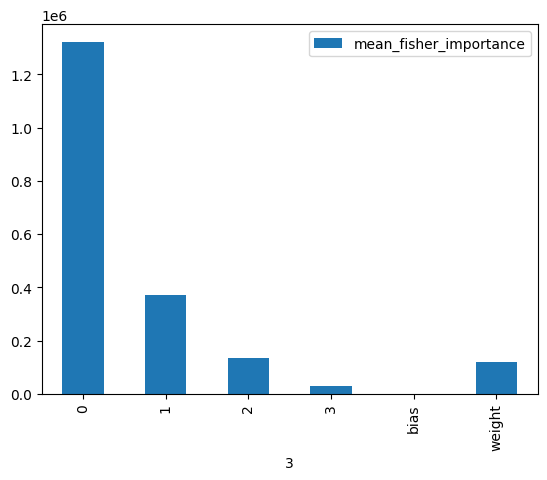

In [32]:
df[df[1]=="decoder"].groupby(3).mean().plot.bar()